##### Startup Success Factors: Industry Perspectives, Milestones Achieved, and Funding Impact
(An Exploratory Data Analysis)

The following is a fun project I decided to do recently mostly as a good way to practice Python and do some exploratory data analysis (EDA).

Here are the main goals I had in mind when writing this:

- Outline the typical workflow of a data analysis project focusing on initial data exploration.

- Understanding some of the factors that contribute to a startup's success.

I really enjoyed analyzing this dataset and found that the more I explored it, the more questions emerged.

**Dataset**

 The dataset we are going to look today is from Kaggle site. 
 It contains intesting information about industries, funding, acquisition and investment information details of nearly a thousand startups going back to the 1980s and extending up to 2013. 
 
We will talk about some interesting factors that seem to have a strong correlation with a startup's success and analyzing these trends, and pose specific questions to guide our analysis in each area:

- **What are the more successful industries and is there more likelihood of startups in a certain realm to succeed**?

Milestones Achievement: 
- **What are the common milestones achieved by successful startups, and how do these milestones vary across different startups?**

Funding: Assessing the amount and type of financial backing received.

- **What role does the amount and type of funding play in the success trajectory of a startup?**

Founding Rounds: Exploring the number and nature of investment rounds and their influence on startup growth.

- **How do the number and nature of founding rounds affect a startup's growth and stability?"**
  






##### <span style="color: #add8e6;"> 1. Loading and Importing

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from datetime import datetime

In [147]:
# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [148]:
notebook_directory = 'data'
file_name = 'startup.csv'
file_path = os.path.join('..', 'data', 'startup.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

 ##### <span style="color: #77dd77;"> Sector or industry each startup operates in and its impact on success: 

I am just going to just jump straight in and figure out whether we can answer our first question. 

Well, we can break it down a bit since there are a number of parts to this question. Let’s first look at the average amount funded, total funding and the number of companies funded by industry and limit the results to the top 10.##

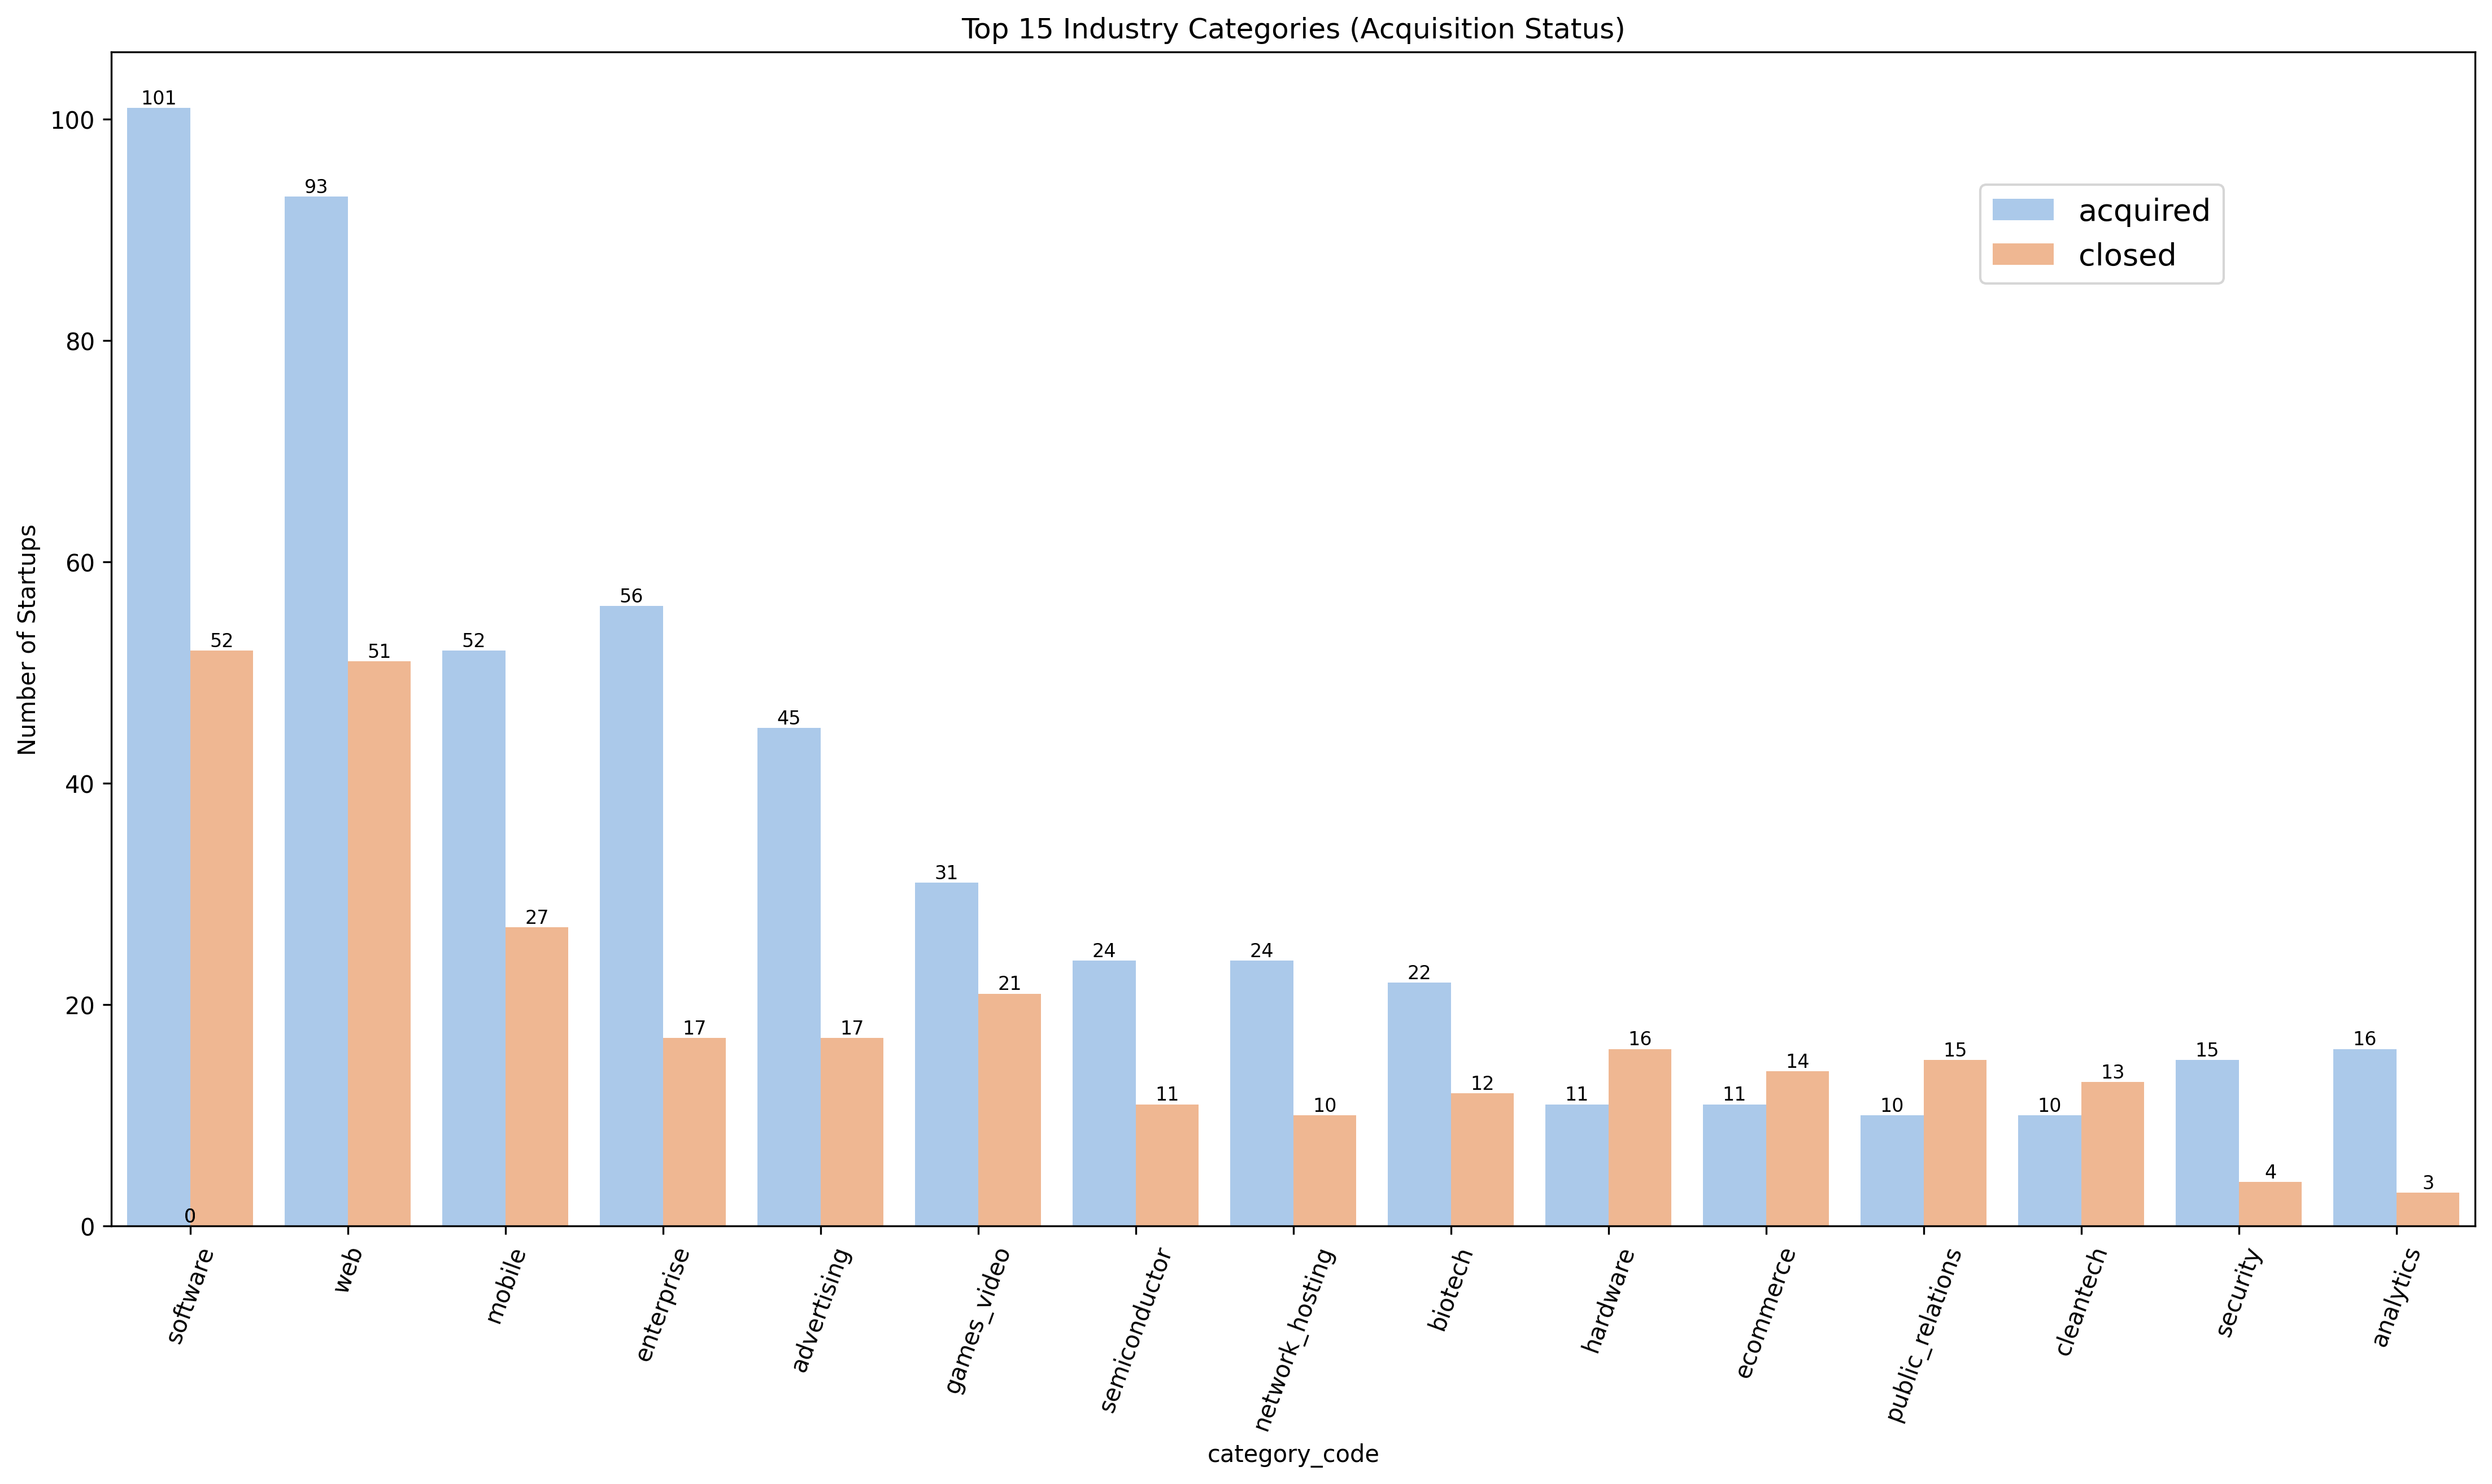

In [149]:
# Getting the order of categories based on their frequency
order = data_df["category_code"].value_counts().index[:15]

plt.figure(figsize=(18, 9), dpi=300)
plt.xticks(rotation=70)
plt.title("Top 15 Industry Categories (Acquisition Status)")

# Specify the hue order explicitly
ax = sns.countplot(x="category_code", data=data_df, order=order, palette="pastel", hue='status', hue_order=['acquired', 'closed'])

plt.ylabel("Number of Startups")
plt.legend(bbox_to_anchor=(0.9, 0.9), fontsize=13)

# Iterate through the patches (bars) and add text
for bar in ax.patches:
    # Get the position and height of the bar
    bar_x = bar.get_x() + bar.get_width() / 2  # X-coordinate of the center of the bar
    bar_height = bar.get_height()  # Height of the bar (count value)

    # Add text above the bar
    ax.text(bar_x, bar_height, f'{int(bar_height)}', 
            fontsize=8, color='black', ha='center', va='bottom')
plt.show()


The software industry seems to have the highest number of startups, with a significant portion of them having been acquired. 

The web, mobile, and enterprise sectors also show a relatively large number of startups compared to other industries, with acquisitions in these categories as well.
<!-- 
The results here are pretty interesting but perhaps not that unexpected as the industries receiving the greatest total funding all appear to be tech related such as biotech/software/e-commerce etc. There is also a pretty close correlation between the industries appearing in all 3 charts below (The charts were all made using mode studio btw). I provide a link at the end of this post to the full report that contains interactive graphs for those wanting to have a look. The highest average amount of funding appears to be in the cleantech sector which is consistent with a push towards producing technology that has less of a negative environmental impact. Ostensibly this is a very welcome development given the stringent carbon targets that many countries have. -->

The results here are pretty interesting but perhaps not that unexpected as the industries receiving the greatest total funding all appear to be tech related such as biotech/software/e-commerce etc. There is also a pretty close correlation between the industries appearing in all 3 charts below (The charts were all made using mode studio btw). I provide a link at the end of this post to the full report that contains interactive graphs for those wanting to have a look. The highest average amount of funding appears to be in the cleantech sector which is consistent with a push towards producing technology that has less of a negative environmental impact. Ostensibly this is a very welcome development given the stringent carbon targets that many countries have.

In [150]:
data_df['founded_at'] = pd.to_datetime(data_df['founded_at'])
data_df['founded_year'] = data_df['founded_at'].dt.strftime('%Y')

prop_df = data_df.groupby('founded_year').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_32213/1559105562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = prop_df, x = 'founded_year', y = 'proportions',palette="rainbow")


Text(0.5, 1.0, 'Distribution of number of startups with year (acuired/not)')

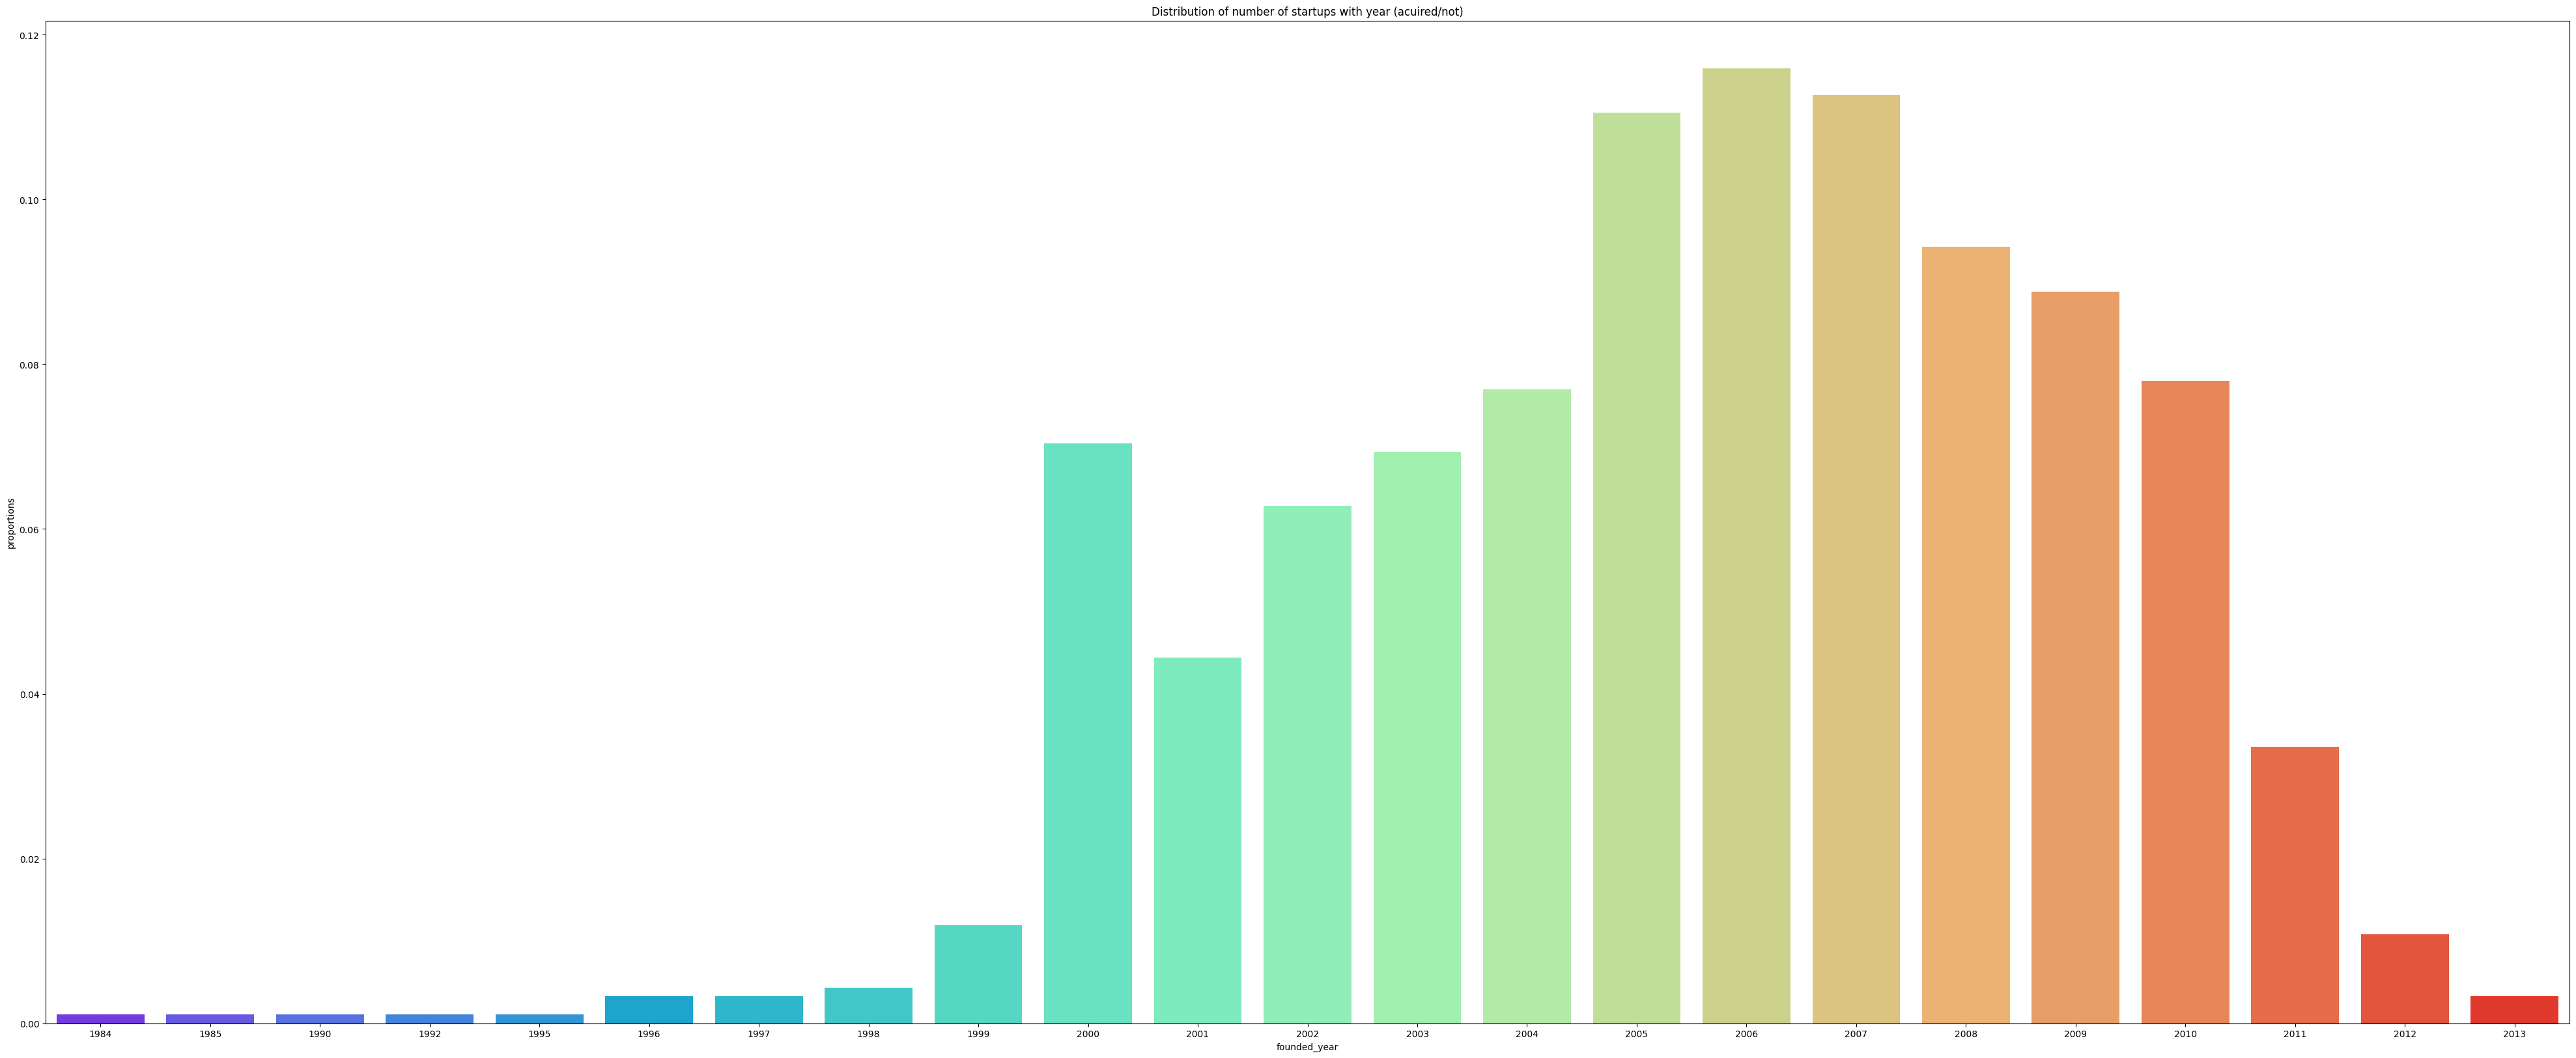

In [151]:
fig, ax = plt.subplots(figsize = (50,20))
sns.barplot(data = prop_df, x = 'founded_year', y = 'proportions',palette="rainbow")
plt.title('Distribution of number of startups with year (acuired/not)')

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the total number of startups in each category
category_totals = data_df['category_code'].value_counts()

# Select the top 15 categories with the most startups
top_15_categories = category_totals.head(15).index

# Filter the cat_year DataFrame to include only these top 15 categories
cat_year_filtered = cat_year[top_15_categories]

# Create the plot
fig, ax = plt.subplots(figsize=(40,10))
sns.lineplot(data=cat_year_filtered, lw=4)

plt.title('Category wise evolution of startups (Top 15 Categories with Most Startups)')
plt.show()

#number of startups in each category has changed or developed over time

NameError: name 'cat_year' is not defined

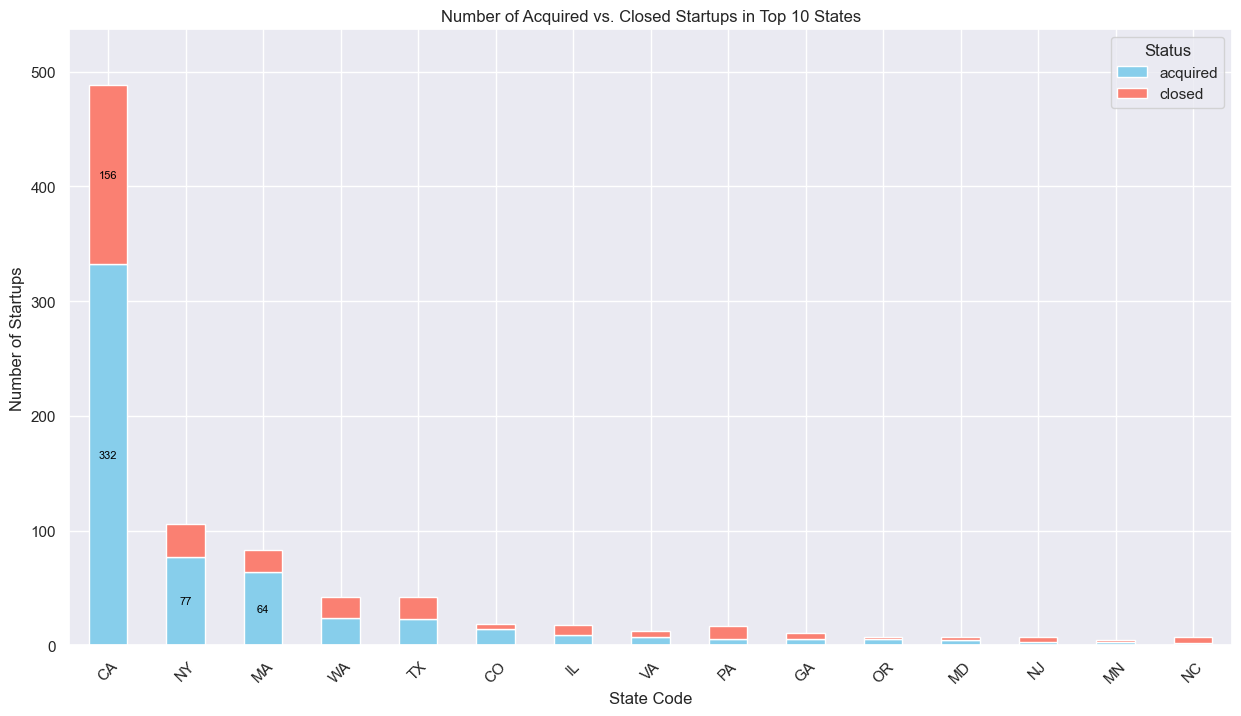

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame and it contains 'state_code' and 'status' columns
grouped_data = data_df.groupby(['state_code', 'status']).size().unstack().fillna(0)

# Sort the DataFrame by the sum of 'acquired' and 'closed' for each state and take the first 10
grouped_data = grouped_data.sort_values(by=['acquired', 'closed'], ascending=False).head(15)

# Convert the index to string to ensure proper handling as categorical data
grouped_data.index = grouped_data.index.astype(str)

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'salmon'])
plt.title('Number of Acquired vs. Closed Startups in Top 10 States')
plt.xlabel('State Code')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)  # Rotates the state labels for better readability
plt.legend(title='Status')

# Define a threshold for displaying annotations
threshold = 50  # Adjust the threshold as needed

# Add text annotations
for i, (state_code, row) in enumerate(grouped_data.iterrows()):
    cumulative_height = 0
    for status in ['acquired', 'closed']:  # Iterate in a specific order
        count = row[status]
        # Display annotation only if count is above the threshold
        if count > threshold:
            # Position text at the center of each segment
            ax.text(i, cumulative_height + count / 2, f'{int(count):,}', 
                    fontsize=8, color='black', ha='center', va='center')
        cumulative_height += count

# Slightly adjust the ylim to make room for text annotations
ax.set_ylim(0, grouped_data.max().sum() * 1.1)  # Increase the y-axis limit
plt.show()

Location

The plot shows California (CA) leading significantly in both acquired and closed startups, followed by New York (NY) and Massachusetts (MA) with more acquisitions than closures. Most other states have minimal startup activity in comparison. 

This suggests a concentration of successful startup activity in a few states.

The bar chart shows California (CA) leading in startup funding, followed by Washington (WA) and Massachusetts (MA). 

The remaining states, including New York (NY) and Texas (TX), show progressively smaller amounts of funding. This indicates a major concentration of startup funding in a few key states, with California being the predominant state for startup investments.

##### <span style="color: #add8e6;"> 2. Cleaning the data 

In [ ]:
# Assuming you have a DataFrame called 'data'
count = data_df['status'].value_counts()
# Print the count with labels
print(f'Acquired: {count[1]}, Closed: {count[0]}')

Acquired: 326, Closed: 597


/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_26439/2792090454.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Acquired: {count[1]}, Closed: {count[0]}')


In [ ]:
data_df['status'] = data_df.status.map({'acquired':1, 'closed':0})
data_df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,1,0,0,0,0,1.0000,0,1,2007
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,1,0,0,1,1,1,4.7500,1,1,2000
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,1,0,0,0,4.0000,1,1,2009
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,1,1,1,3.3333,1,1,2002
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1,1,0,0,0,0,1.0000,1,0,2010
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,0,0,0,1,0,0,3.0000,1,0,2002
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,1,0,1,1,0,0,1.6667,1,1,2005
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,0,0,1,1,0,1,3.5000,1,1,2004
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,1,0,1,0,0,1,4.0000,1,1,2002
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,1,1,1,0,0,0,1.0000,1,1,2005


**Drop the irrelevant features from 48 columns**

In [ ]:
data_df = data_df.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
data_df

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,2007
1,CA,Los Gatos,2000-01-01,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,2000
2,CA,San Diego,2009-03-18,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,2009
3,CA,Cupertino,2002-01-01,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,2002
4,CA,San Francisco,2010-08-01,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,2009-01-01,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,0,0,1,0,0,0,6.0000,1,1,2009
919,MA,Burlington,1998-01-01,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,1,0,0,1,0,0,2.6667,1,0,1998
920,CA,Sunnyvale,1999-01-01,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,0,0,0,0,0,1,8.0000,1,0,1999
921,CA,San Francisco,2009-01-01,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,0,0,1,1,0,0,1.0000,1,1,2009


In [ ]:
num_columns = len(data_df.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 25 columns.


 ##### <span style="color: #add8e6;"> Looking for missing values 

In [ ]:
x= data_df.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
status                        0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
founded_year                  0
dtype: int64

- "closed_at"

In [ ]:
data_df['closed_at'] = data_df['closed_at'].fillna(value="x")
data_df['closed_at'] = data_df.closed_at.apply(lambda x: 1 if x =='x' else 0)

"In our dataset, we treat missing 'closed_at' dates as an indicator that the startup was still operating at the time the data was collected, marking these as 'x'. To aid our binary classification, we then convert the 'closed_at' column: 'x' signifies ongoing operations (marked as 0), while any other value indicates closure (marked as 1). This approach helps us analyze startups based on their operational status."

In [ ]:
# # Sort DataFrame by 'closed_at' in descending order
# data_df = data_df.sort_values(by='closed_at', ascending=False )
# # Find the last closing date
# last_closed_date = data_df['closed_at'].dropna().iloc[0]
# print("Last startup closing date:", last_closed_date)

In [ ]:
print(f'Earliest startup founding date: {data_df.founded_at.min()}')
print(f'Latest startup founding date: {data_df.founded_at.max()}')

Earliest startup founding date: 1984-01-01 00:00:00
Latest startup founding date: 2013-04-16 00:00:00


- "age_first_milestone_year" 
- "age_last_milestone_year"

In [ ]:
data_df["age_first_milestone_year"].fillna((data_df["age_first_milestone_year"].mean()), inplace=True)
data_df["age_last_milestone_year"].fillna((data_df["age_last_milestone_year"].mean()), inplace=True)

In [ ]:
data= data_df.isnull().sum()
data.sort_values(ascending=False)

state_code                  0
milestones                  0
status                      0
is_top500                   0
avg_participants            0
has_roundD                  0
has_roundC                  0
has_roundB                  0
has_roundA                  0
has_angel                   0
has_VC                      0
category_code               0
funding_total_usd           0
city                        0
funding_rounds              0
relationships               0
age_last_milestone_year     0
age_first_milestone_year    0
age_last_funding_year       0
age_first_funding_year      0
last_funding_at             0
first_funding_at            0
closed_at                   0
founded_at                  0
founded_year                0
dtype: int64

**General Changes:*

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
- Handling Missing Values in 'closed_at': Missing values in 'closed_at' represent startups that are still open and will not be filled. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.

##### <span style="color: #add8e6;"> Handle Negative values 

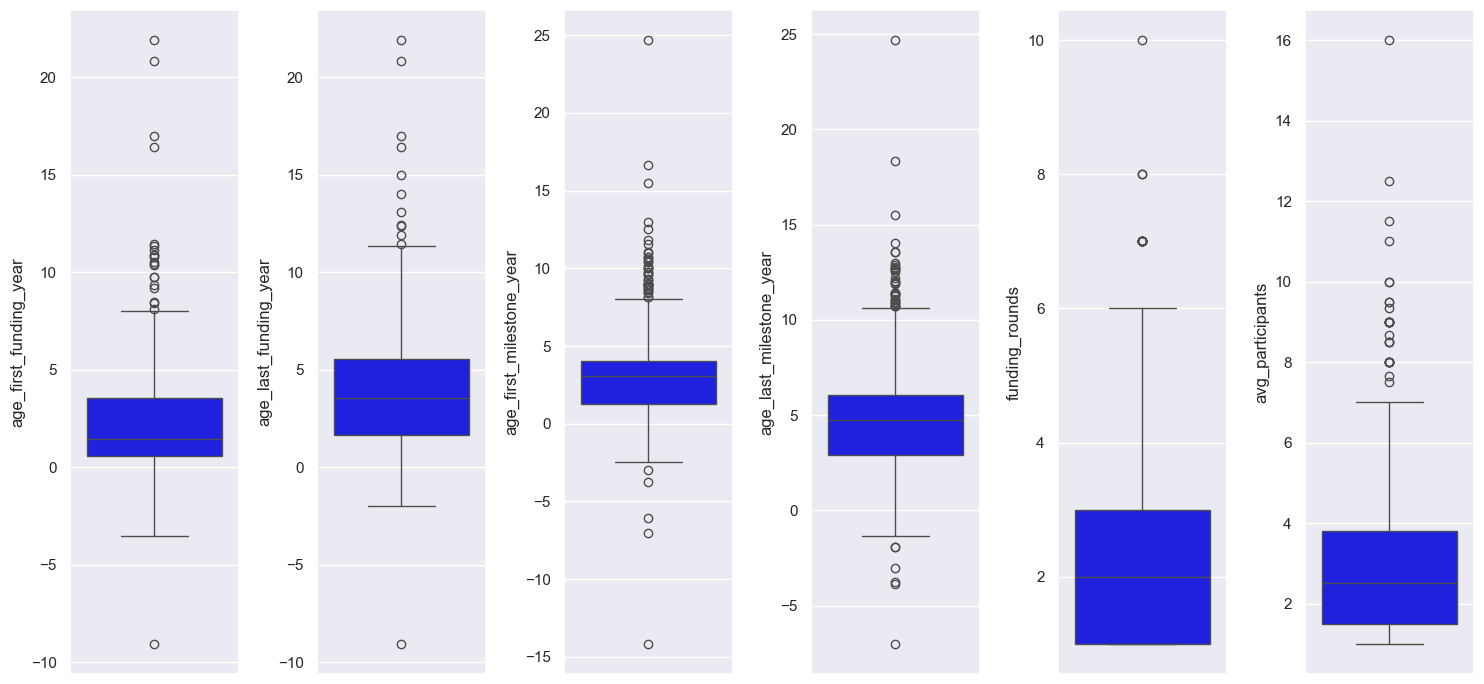

In [ ]:
# To find how much there are outliers in dataset, we should use only continuous variables and the ones that are relevant for our analysis, because rest of numerical variables are binary variables including 0 and 1

featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_rounds','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data_df[featuresNumfinal[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
data_df.founded_at=pd.to_datetime(data_df.founded_at)
data_df.first_funding_at=pd.to_datetime(data_df.first_funding_at)
data_df.last_funding_at=pd.to_datetime(data_df.last_funding_at)

data_df.head(3)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.00,0,1,2007
1,CA,Los Gatos,2000-01-01,1,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.75,1,1,2000
2,CA,San Diego,2009-03-18,1,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.00,1,1,2009


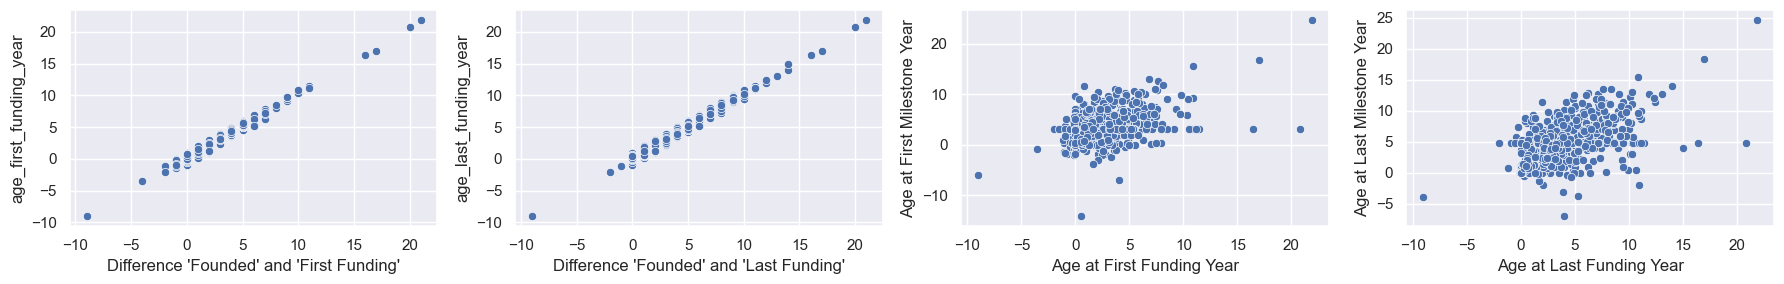

In [ ]:
# What does it mean "age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year" , let's together analyze it

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_df' is a pandas DataFrame with the necessary columns and datetime information

plt.figure(figsize=(18, 3), dpi=100)

# First subplot
plt.subplot(1, 4, 1)
sns.scatterplot(x=data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year, 
                y=data_df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

# Second subplot
plt.subplot(1, 4, 2)
sns.scatterplot(x=data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year, 
                y=data_df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'")

# Third subplot
plt.subplot(1, 4, 3)
sns.scatterplot(x=data_df["age_first_funding_year"], 
                y=data_df["age_first_milestone_year"])
plt.xlabel("Age at First Funding Year")
plt.ylabel("Age at First Milestone Year")

# Fourth subplot
plt.subplot(1, 4, 4)
sns.scatterplot(x=data_df["age_last_funding_year"], 
                y=data_df["age_last_milestone_year"])
plt.xlabel("Age at Last Funding Year")
plt.ylabel("Age at Last Milestone Year")

plt.tight_layout()  # Adjust the layout
plt.show()


# As we see the graph, we can say high correlation between funding date and age funding. Difference between "last_funding_at" and "founded_at" is related "age_last_funding_year".
# "age_first_funding_year" and "age_last_funding_year" have negative values,it shouldn't be and also it can not be that "founded" date higher than "first_funding_at" and "last_funding_at"
# So we must get the absolute value of columns including negative value

In [ ]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(data_df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [ ]:
# we must get the absolute value of columns including negative value
data_df["age_first_funding_year"]=np.abs(data_df["age_first_funding_year"])
data_df["age_last_funding_year"]=np.abs(data_df["age_last_funding_year"])
data_df["age_first_milestone_year"]=np.abs(data_df["age_first_milestone_year"])
data_df["age_last_milestone_year"]=np.abs(data_df["age_last_milestone_year"])

In [ ]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(data_df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


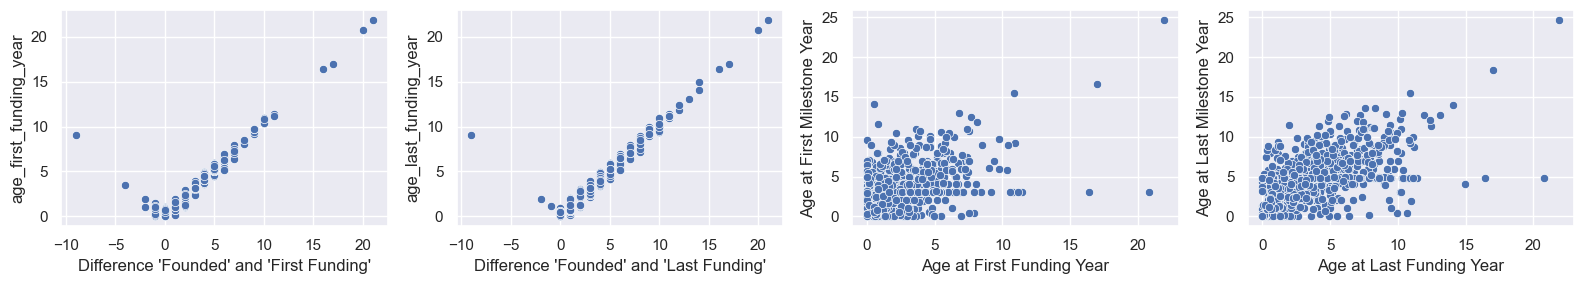

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_df' is a pandas DataFrame with the necessary datetime columns and data

plt.figure(figsize=(16, 3), dpi=100)

# First subplot
plt.subplot(1, 4, 1)
sns.scatterplot(x=(data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

# Second subplot
plt.subplot(1, 4, 2)
sns.scatterplot(x=(data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'")

# Third subplot
plt.subplot(1, 4, 3)
sns.scatterplot(x=data_df["age_first_funding_year"], 
                y=data_df["age_first_milestone_year"])
plt.xlabel("Age at First Funding Year")
plt.ylabel("Age at First Milestone Year")

# Fourth subplot
plt.subplot(1, 4, 4)
sns.scatterplot(x=data_df["age_last_funding_year"], 
                y=data_df["age_last_milestone_year"])
plt.xlabel("Age at Last Funding Year")
plt.ylabel("Age at Last Milestone Year")

plt.tight_layout()  # Adjust the layout
plt.show()

##### <span style="color: #add8e6;"> Handle Outliers

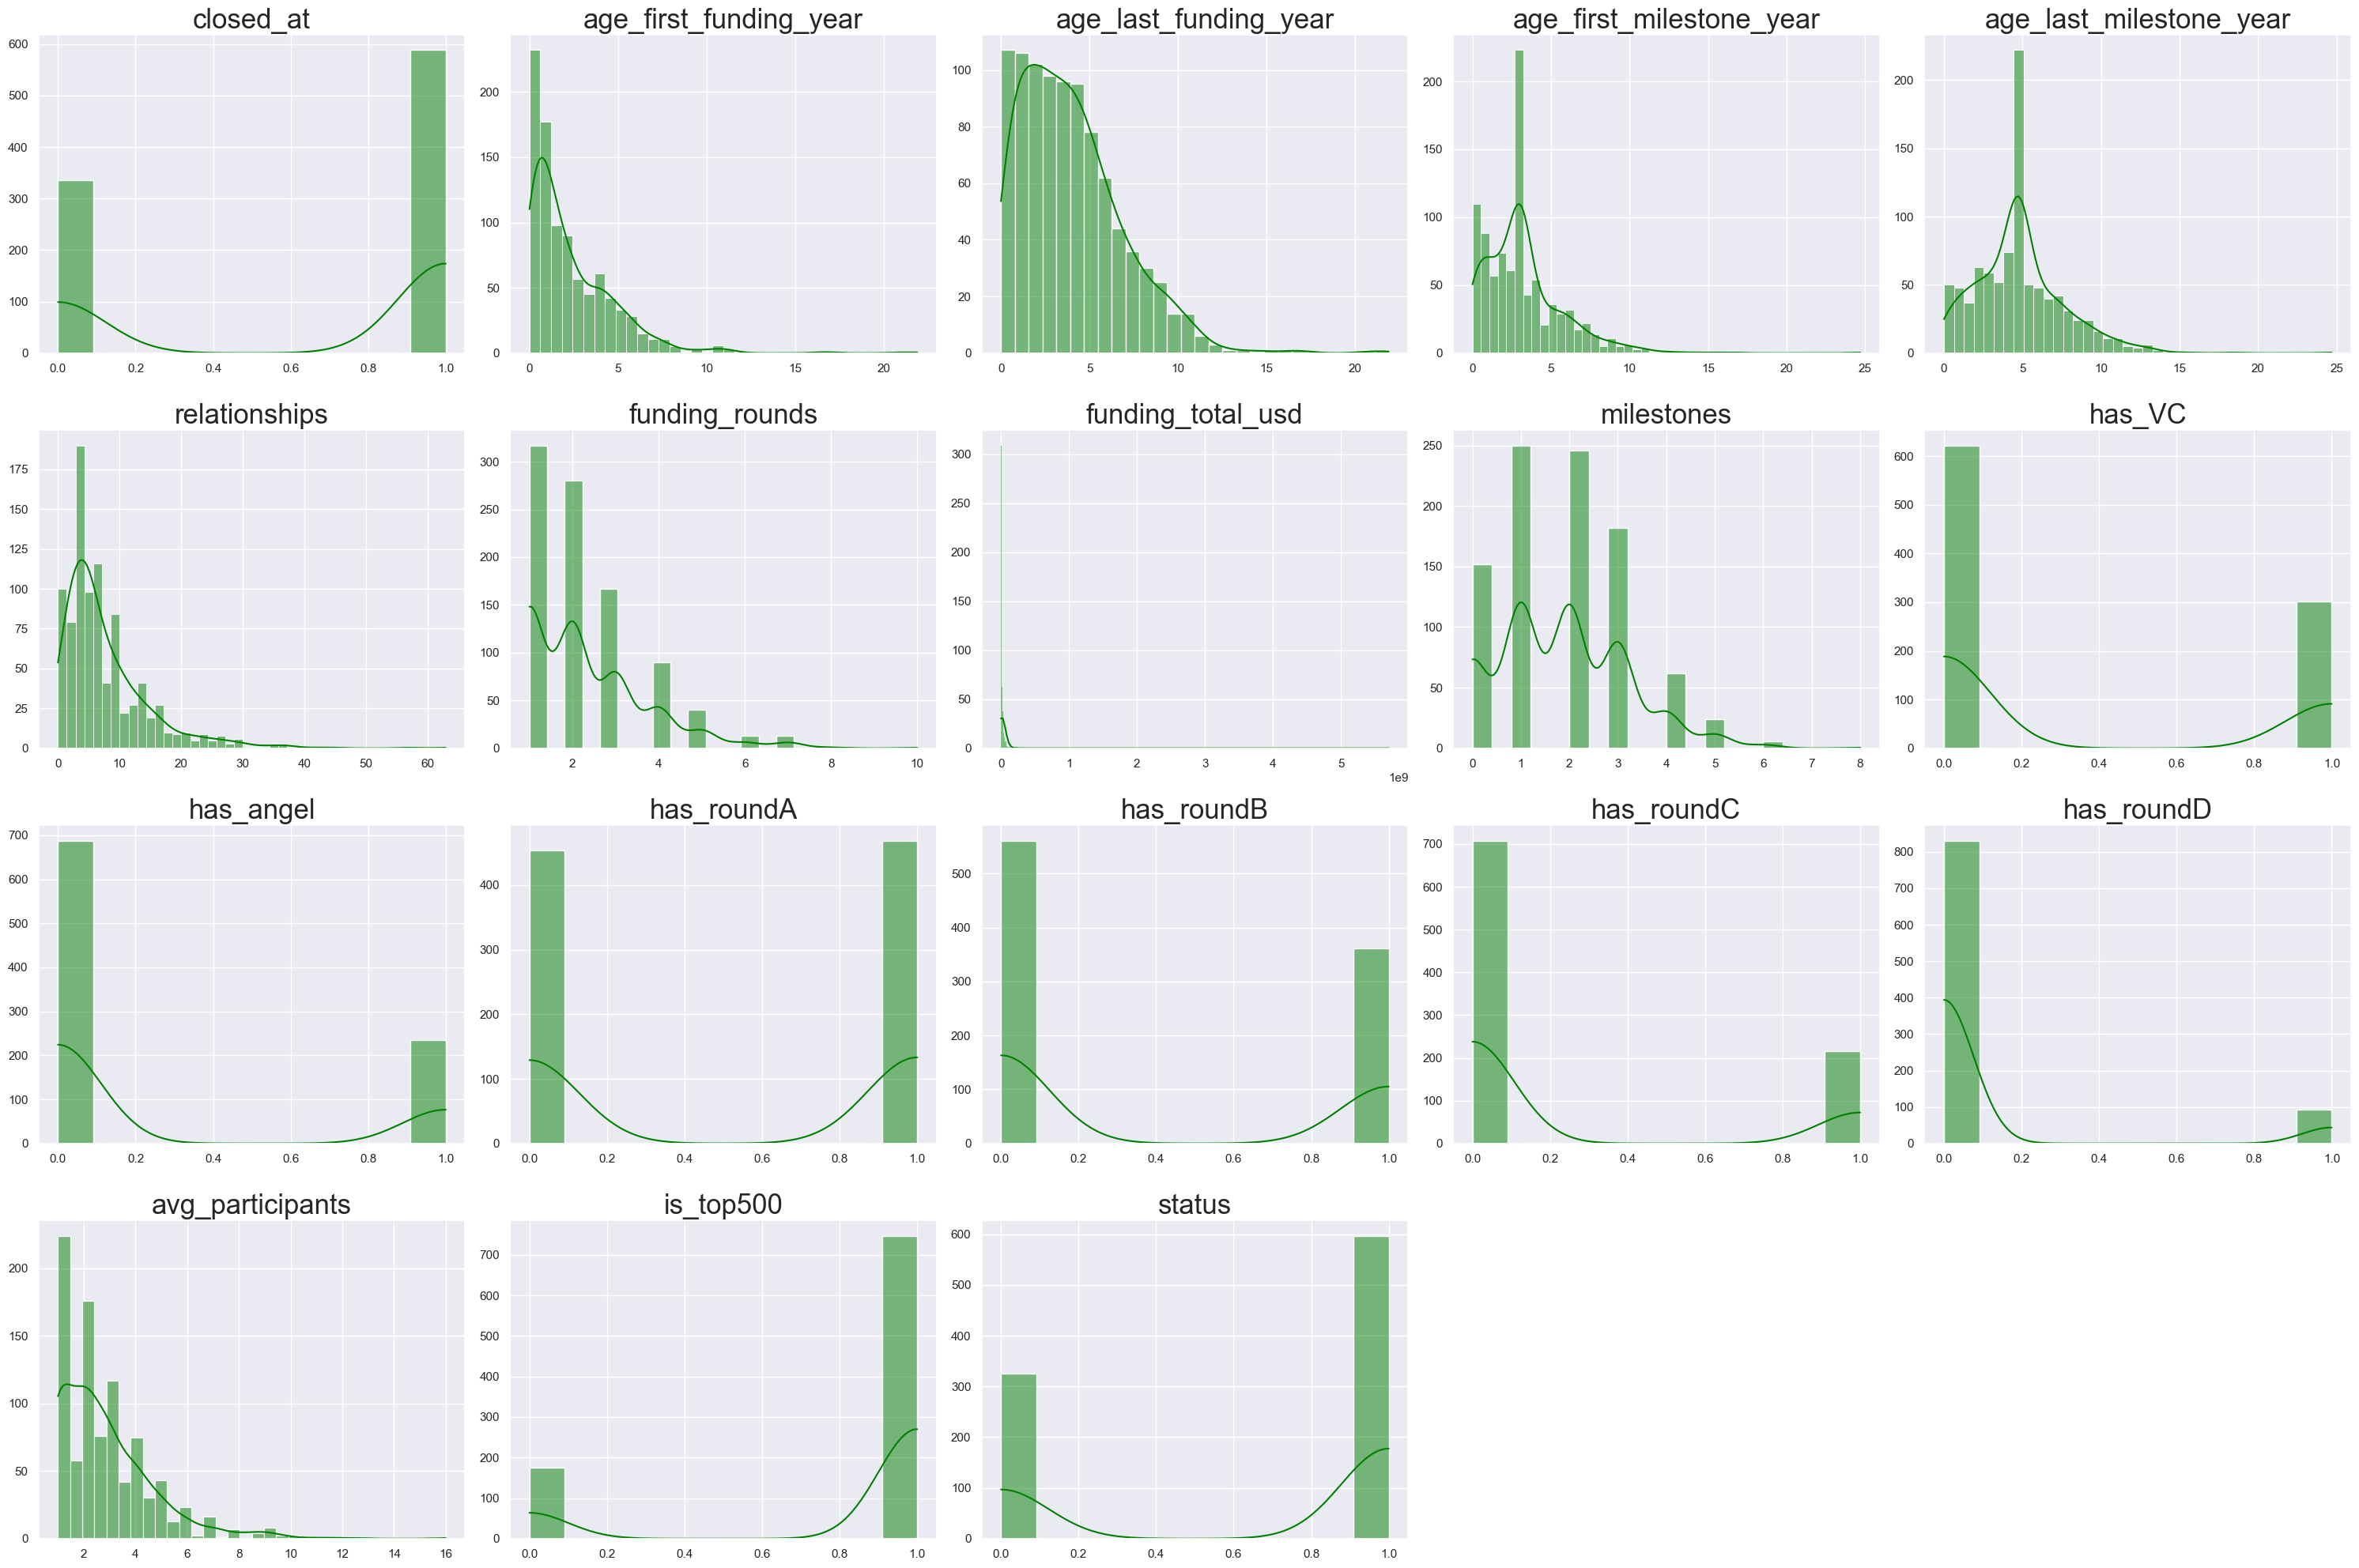

In [ ]:
# Select only numeric columns for histogram plots
numeric_columns = data_df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplots
num_variables = len(numeric_columns)
num_columns = 5  # You can choose how many columns you want per row
num_rows = int(np.ceil(num_variables / num_columns))

# Set the overall figure size to give each subplot a little more room
fig_width = num_columns * 6  # 5 inches per subplot column
fig_height = num_rows * 5    # 4 inches per subplot row

plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(column, fontsize=25)
    sns.histplot(data_df[column], color="green", kde=True)  # Adding KDE for smooth distribution curve.
    plt.xlabel('')  # Remove x labels to prevent clutter
    plt.ylabel('')  # Remove y labels to prevent clutter

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

zscores=zscore(data_df["age_first_funding_year"])

for threshold in range(1,8,1):
    print("Threshold value: {}". format(threshold))
    print("Number of outliers: {}".format(len(np.where(zscores>threshold)[0])))
    print("------------------------")

Threshold value: 1
Number of outliers: 128
------------------------
Threshold value: 2
Number of outliers: 36
------------------------
Threshold value: 3
Number of outliers: 15
------------------------
Threshold value: 4
Number of outliers: 4
------------------------
Threshold value: 5
Number of outliers: 4
------------------------
Threshold value: 6
Number of outliers: 3
------------------------
Threshold value: 7
Number of outliers: 2
------------------------


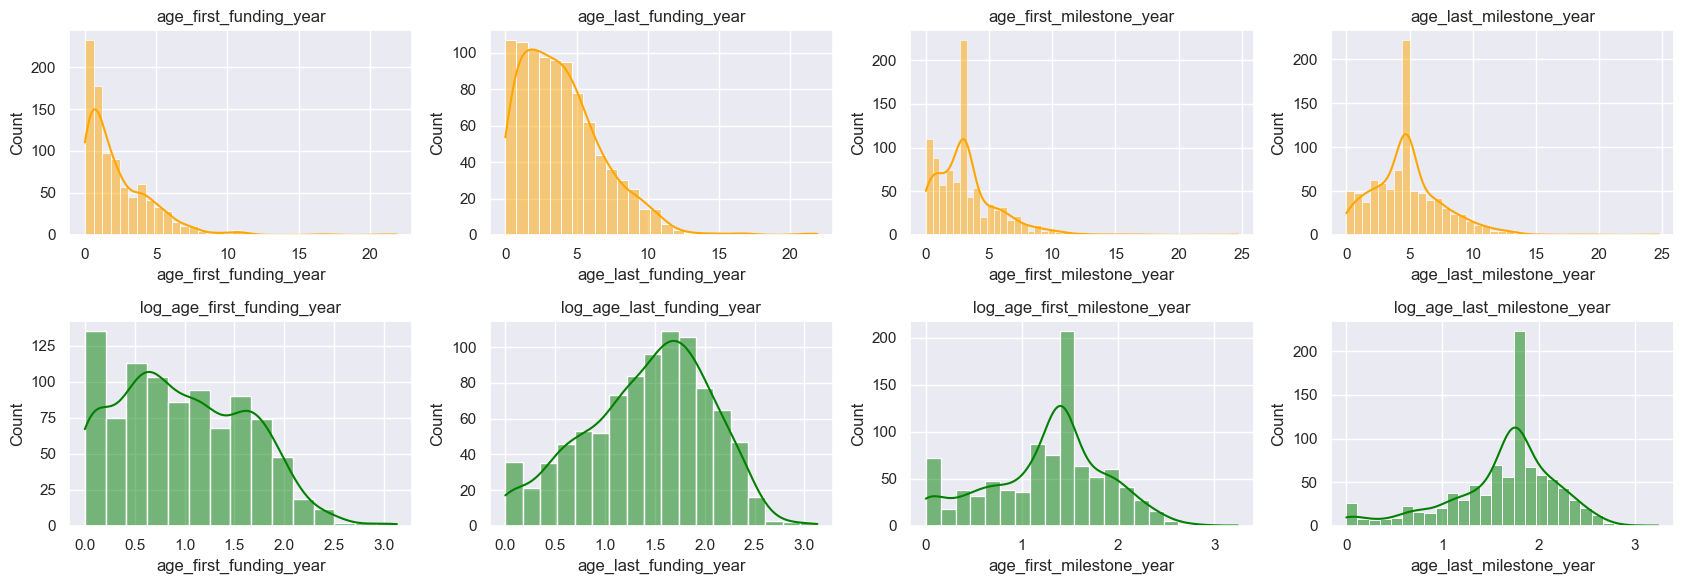

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

variables = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]

# Create a figure with a specific size
plt.figure(figsize=(17, 6), dpi=100)

# Loop through the list of variables
for i, variable in enumerate(variables):
    # Regular histogram
    plt.subplot(2, 4, i + 1)
    sns.histplot(data_df[variable], color="orange", kde=True)
    plt.title(variable)

    # Log-transformed histogram
    plt.subplot(2, 4, i + 5)
    log_variable = np.log(data_df[variable] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(log_variable, color="green", kde=True)
    plt.title(f"log_{variable}")

plt.tight_layout()
plt.show()

##### <span style="color: #add8e6;"> 3. Data Transformation

In [ ]:
print(data_df.dtypes)

state_code                          object
city                                object
founded_at                  datetime64[ns]
closed_at                            int64
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
category_code                       object
has_VC                               int64
has_angel                            int64
has_roundA                           int64
has_roundB                           int64
has_roundC                           int64
has_roundD                           int64
avg_participants                   float64
is_top500                            int64
status     

BEFORE

In [ ]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,2007
1,CA,Los Gatos,2000-01-01,1,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,2000
2,CA,San Diego,2009-03-18,1,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,2009
3,CA,Cupertino,2002-01-01,1,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,2002
4,CA,San Francisco,2010-08-01,0,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,2010
5,CA,Mountain View,2002-01-01,0,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,0,1,0,0,3.0000,1,0,2002
6,CA,Mountain View,2005-01-01,1,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,1,0,1,1,0,0,1.6667,1,1,2005
7,CA,San Rafael,2004-01-01,1,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,0,1,1,0,1,3.5000,1,1,2004
8,MA,Williamstown,2002-01-01,1,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,1,0,1,0,0,1,4.0000,1,1,2002
9,CA,Palo Alto,2005-06-01,1,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,1,0,0,0,1.0000,1,1,2005


In [ ]:
# Assuming your_data_df is your main DataFrame
data_df = data_df

# List of date columns
date_columns = ['closed_at']

# Convert date columns (objects) to datetime
for date_column in date_columns:
    data_df[date_column] = pd.to_datetime(data_df[date_column], errors='coerce')

# Sort DataFrame by 'closed_at' in descending order
data_df = data_df.sort_values(by='closed_at', ascending=False )

# Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]
print("Last startup closing date:", last_closed_date)

# Create a temporary variable 'closed_temp' with the non-null values of 'closed_at'
closed_temp = data_df['closed_at'].copy()

# Fill the null values in 'closed_temp' with the last closed date
closed_temp.fillna(last_closed_date, inplace=True)

# Calculate the relative age based on 'founded_at' and 'closed_temp'
data_df['age'] = ((closed_temp - data_df['founded_at']).dt.days / 365.25).round(4)

# Replace missing values in the original 'closed_at' 
#By filling the NaNs (which represent startups that are still open) with a placeholder value (like "x"),
#and then converting that placeholder to 1, you are effectively creating a binary variable where 1 indicates a startup is still operating.
#By setting known closed_at values (which represent startups that have closed) to 0, you're indicating that these startups are not operating anymore.

data_df['closed_at'] = data_df['closed_at'].fillna(value="x")
data_df['closed_at'] = data_df.closed_at.apply(lambda x: 1 if x =='x' else 0)



Last startup closing date: 1970-01-01 00:00:00.000000001


To calculate age We fill column last_date with 2013-10-30 with assumption that is the last number of dataset

In [ ]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year,age
0,CA,San Diego,2007-01-01,0,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,1,0,0,0,0,1.0000,0,1,2007,-36.9993
1,CA,Los Gatos,2000-01-01,0,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,0,0,1,1,1,4.7500,1,1,2000,-29.9986
2,CA,San Diego,2009-03-18,0,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,1,0,0,0,4.0000,1,1,2009,-39.2088
3,CA,Cupertino,2002-01-01,0,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,1,1,1,3.3333,1,1,2002,-32.0000
4,CA,San Francisco,2010-08-01,0,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,0,0,0,0,1.0000,1,0,2010,-40.5804
5,CA,Mountain View,2002-01-01,0,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,1,0,0,3.0000,1,0,2002,-32.0000
6,CA,Mountain View,2005-01-01,0,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,0,1,1,0,0,1.6667,1,1,2005,-35.0007
7,CA,San Rafael,2004-01-01,0,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,1,1,0,1,3.5000,1,1,2004,-33.9986
8,MA,Williamstown,2002-01-01,0,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,0,1,0,0,1,4.0000,1,1,2002,-32.0000
9,CA,Palo Alto,2005-06-01,0,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,0,0,0,1.0000,1,1,2005,-35.4141


Converting categorical to Numerical values
- Following variables : 'state_code', 'city', 'category_code'

In [ ]:
# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Dictionary to store mappings
column_mappings = {}

# Create a function to generate mappings
def create_mapping(column):
    unique_values = data_df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    data_df[column] = data_df[column].map(mapping)
    # Save mapping in the dictionary
    column_mappings[column] = mapping

# Now, column_mappings contains the desired dictionary structure
print(column_mappings)

{'state_code': {'CA': 0, 'MD': 1, 'CO': 2, 'MA': 3, 'NY': 4, 'GA': 5, 'PA': 6, 'IL': 7, 'TN': 8, 'KY': 9, 'MN': 10, 'TX': 11, 'NV': 12, 'VA': 13, 'OR': 14, 'ME': 15, 'NJ': 16, 'DC': 17, 'WA': 18, 'UT': 19, 'IN': 20, 'FL': 21, 'AZ': 22, 'RI': 23, 'NH': 24, 'MO': 25, 'NC': 26, 'WV': 27, 'MI': 28, 'OH': 29, 'CT': 30, 'AR': 31, 'WI': 32, 'ID': 33, 'NM': 34}, 'city': {'San Diego': 0, 'San Francisco': 1, 'San Mateo': 2, 'Santa Clara': 3, 'Chevy Chase': 4, 'Palo Alto': 5, 'Sunnyvale': 6, 'Calabasas': 7, 'Louisville': 8, 'Woburn': 9, 'Menlo Park': 10, 'Campbell': 11, 'New York': 12, 'Boxborough': 13, 'Atlanta': 14, 'Cambridge': 15, 'Santa Monica': 16, 'New Hope': 17, 'Petaluma': 18, 'Redwood City': 19, 'North Hollywood': 20, 'Boulder': 21, 'Carpinteria': 22, 'Mountain View': 23, 'Chicago': 24, 'New York City': 25, 'Nashville': 26, 'Belmont': 27, 'Lexington': 28, 'Waltham': 29, 'Los Altos': 30, 'Minnetonka': 31, 'Cupertino': 32, 'South San Francisco': 33, 'Pleasanton': 34, 'Austin': 35, 'Los An

In [ ]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year,age
0,0,0,2007-01-01,0,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,1,0,0,0,0,1.0000,0,1,2007,-36.9993
1,0,67,2000-01-01,0,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,0,0,1,1,1,4.7500,1,1,2000,-29.9986
2,0,0,2009-03-18,0,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,1,0,0,0,4.0000,1,1,2009,-39.2088
3,0,32,2002-01-01,0,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,1,1,1,3.3333,1,1,2002,-32.0000
4,0,1,2010-08-01,0,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,0,0,0,0,1.0000,1,0,2010,-40.5804
5,0,23,2002-01-01,0,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,1,0,0,3.0000,1,0,2002,-32.0000
6,0,23,2005-01-01,0,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,0,1,1,0,0,1.6667,1,1,2005,-35.0007
7,0,103,2004-01-01,0,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,1,1,0,1,3.5000,1,1,2004,-33.9986
8,3,118,2002-01-01,0,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,0,1,0,0,1,4.0000,1,1,2002,-32.0000
9,0,5,2005-06-01,0,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,0,0,0,1.0000,1,1,2005,-35.4141


In [ ]:
numerical_features = data_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = data_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = data_df.select_dtypes(include=['datetime']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['is_acquired']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nDatetime Features ({0}):".format(len(datetime_features)))
print(datetime_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (22):
['state_code', 'city', 'closed_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status', 'age']

Categorical Features (1):
['founded_year']

Datetime Features (3):
['founded_at', 'first_funding_at', 'last_funding_at']

Target Variable (1):
['is_acquired']


In [ ]:
# #I dont need them because i already used them to calculate age (Avoid Multicollinearity)
# # Assuming 'data_df' is your DataFrame
# data_df = data_df.drop(['founded_at', 'closed_at'], axis=1)

 ##### <span style="color: #77dd77;"> Correlation between variables and startup success

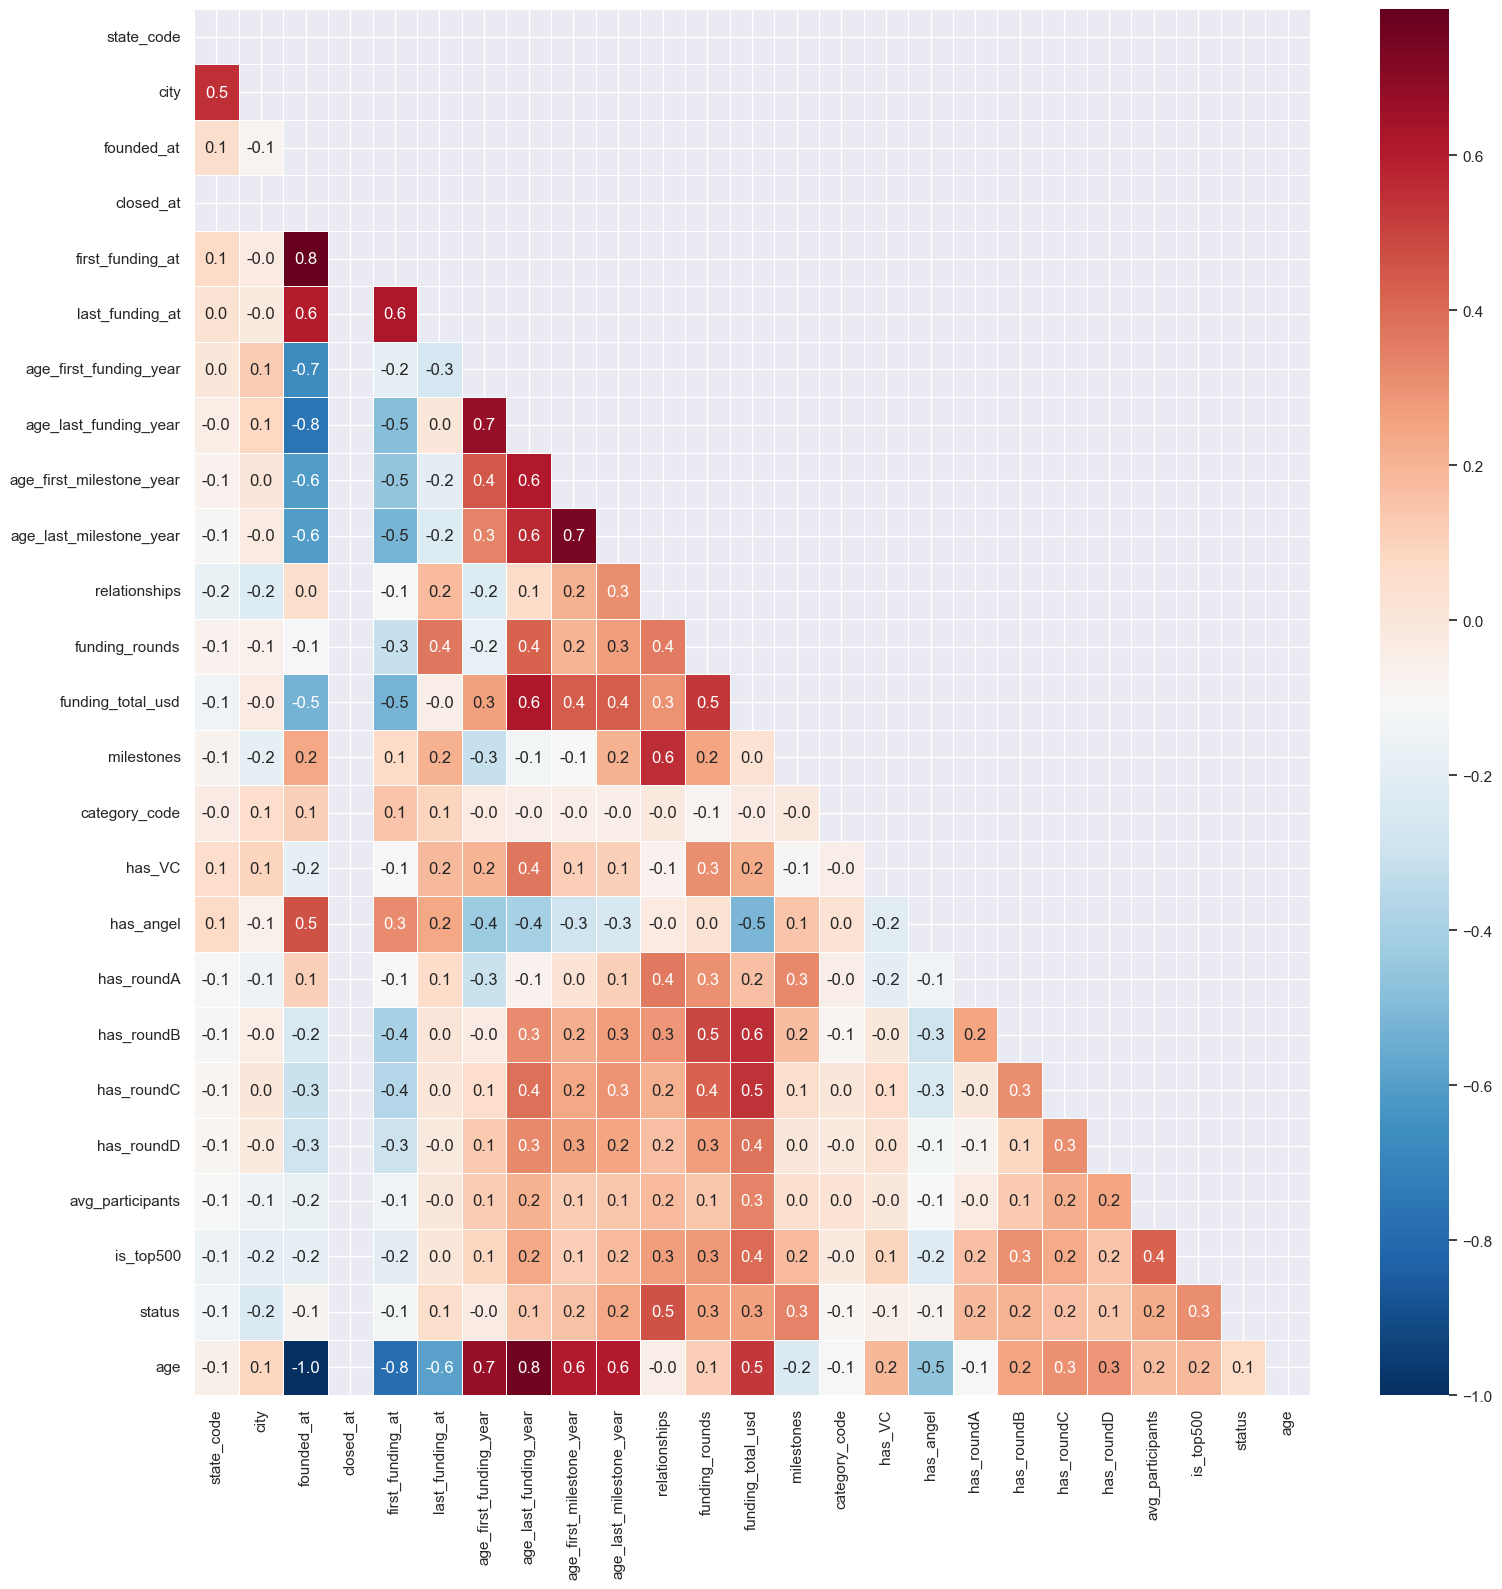

In [ ]:
def draw_heatmap(data_df):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = data_df.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime']
numerical_df_1 = data_df.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

- Relationships (0.5):

A moderate positive correlation indicates that companies with more relationships tend to align positively with the target. This suggests the importance of networking and connections.
Assumption: Strong networks could offer better resource access, benefiting the target outcome.
- Age Last Milestone Year (0.4):

Companies achieving milestones later in their lifecycle show a moderate correlation with the target, hinting at the value of sustained growth and long-term strategies.
Assumption: Maturity and persistence might be key factors influencing the target.
- Age First Milestone Year (0.4):

Early achievement of milestones correlates moderately with the target, indicating early success or potential as significant.
Assumption: Early milestones could reflect innovation or effective initial strategies.
- Founding Rounds (0.3):

A slight positive correlation suggests that more funding rounds might slightly influence the target, possibly indicating investor confidence or market validation.
Assumption: Repeated funding could signal a company's resilience and growth potential.
- Funding Total USD (0.3):

The total funding amount has a weak positive relationship with the target, suggesting that higher funding can be beneficial but is not a decisive factor.
Assumption: While important, funding alone is not the sole determinant of the target outcome.


In our analysis, we noted significant correlations between features such as first_funding_at and founded_at. Given the robustness of the Random Forest model against multicollinearity, these correlations present less concern for our analysis. While acknowledging these correlations for comprehensive data understanding, we retain these features in our model. This approach leverages Random Forest's strengths while ensuring a nuanced interpretation of our dataset.


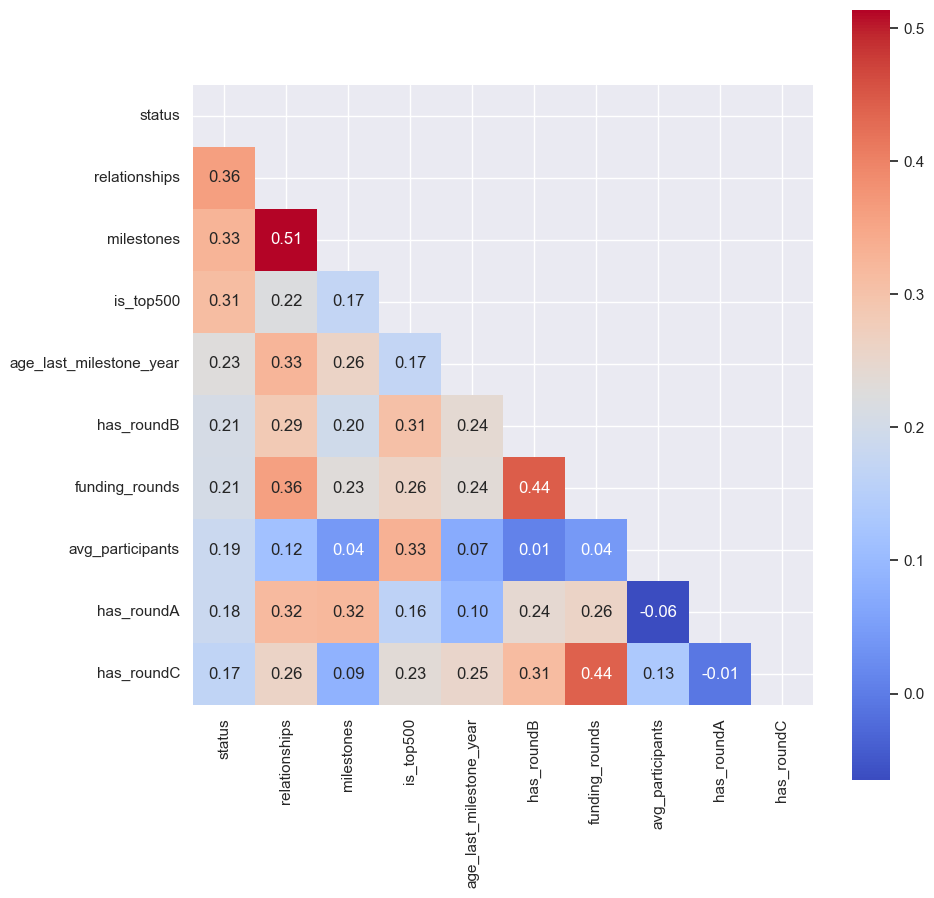

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_df' is your existing DataFrame and 'is_acquired' is your target variable

# Select all columns, including datetime
cols = data_df.columns

# Calculate the correlation of the numerical features with the target variable
numeric_cols = data_df.select_dtypes(include=[np.number])
cols = numeric_cols.corr().nlargest(10, 'status')['status'].index

# Compute the correlation matrix for the selected features
cm = np.corrcoef(data_df[cols].values.T)

# Create a mask to hide the lower triangle (including the diagonal)
mask = np.triu(np.ones_like(cm, dtype=bool))

# Plot the heatmap with the mask
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'fontsize': 12}, mask=mask, cmap='coolwarm', yticklabels=cols.values, xticklabels=cols.values)
plt.show()


##### <span style="color: #77dd77;"> Visualizations

#### Milestone Achievement 1

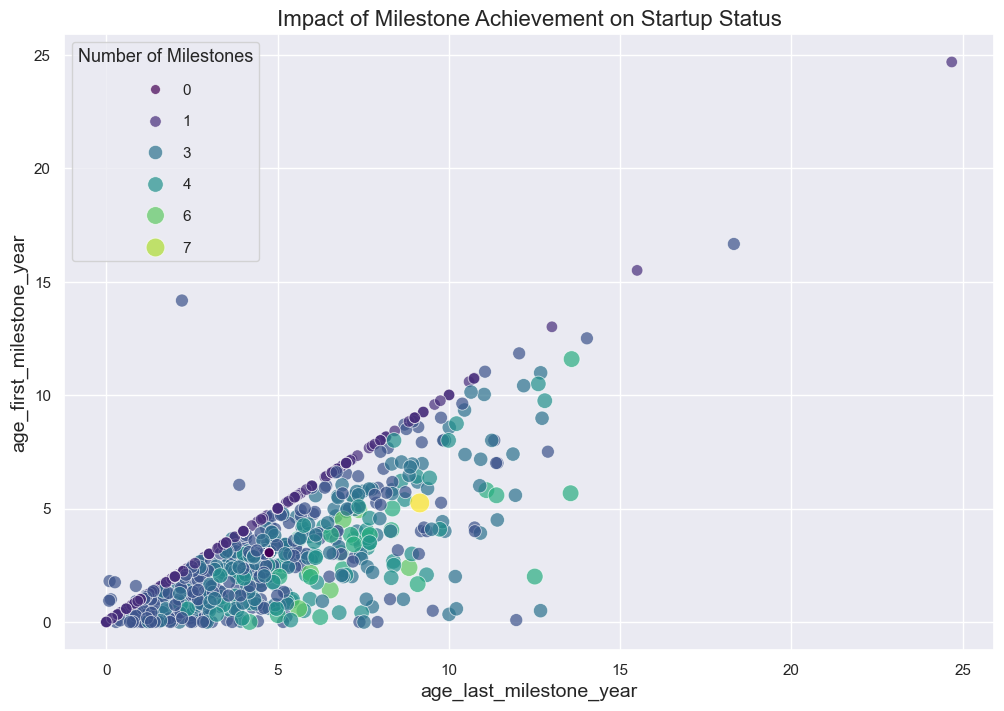

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame and it contains the necessary columns

# Calculate the duration between the first and last milestones
data_df['milestone_span'] = data_df['age_last_milestone_year'] - data_df['age_first_milestone_year']

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='age_last_milestone_year', y='age_first_milestone_year', size='milestones',
                          sizes=(50, 200), hue='milestones', data=data_df, palette='viridis', alpha=0.7)

plt.title('Impact of Milestone Achievement on Startup Status', fontsize=16)
plt.xlabel('age_last_milestone_year', fontsize=14)
plt.ylabel('age_first_milestone_year', fontsize=14)
plt.legend(title='Number of Milestones', title_fontsize='13', labelspacing=1.15)
plt.grid(True)
plt.show()

#### Milestones Achievement over time 

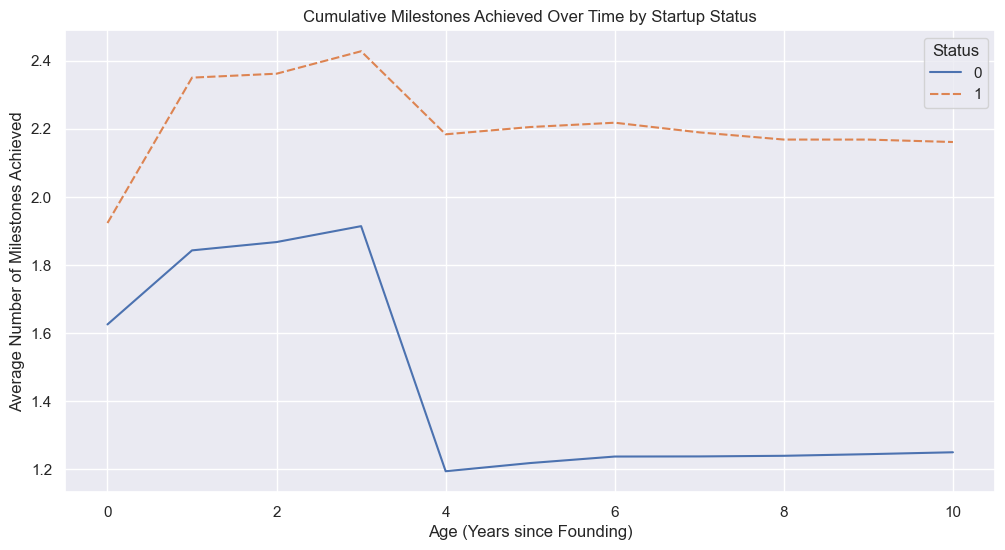

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data_df' has columns like 'age_first_milestone_year', 'age_last_milestone_year', 'status', etc.

# Create a new DataFrame to hold the cumulative milestone data
cumulative_milestones = pd.DataFrame()

# Define the age intervals (e.g., 0 to 10 years)
age_intervals = range(0, 11)  # Adjust this as necessary for your data

# Populate the DataFrame
for age in age_intervals:
    # Here, we assume that 'milestones' is a count of milestones achieved up to that age
    cumulative_data = data_df[data_df['age_first_milestone_year'] <= age].groupby('status')['milestones'].mean().reset_index()
    cumulative_data['age'] = age
    cumulative_milestones = pd.concat([cumulative_milestones, cumulative_data])

# Pivot the DataFrame to have ages as rows and statuses as columns
cumulative_milestones_pivot = cumulative_milestones.pivot(index='age', columns='status', values='milestones')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_milestones_pivot)
plt.title('Cumulative Milestones Achieved Over Time by Startup Status')
plt.xlabel('Age (Years since Founding)')
plt.ylabel('Average Number of Milestones Achieved')
plt.legend(title='Status')
plt.show()


#### Impact Early Funding on Time 

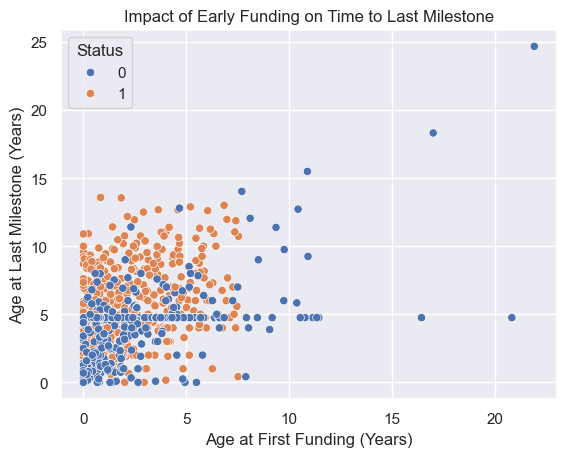

In [ ]:
sns.scatterplot(x='age_first_funding_year', y='age_last_milestone_year', hue='status', data=data_df)
plt.title('Impact of Early Funding on Time to Last Milestone')
plt.xlabel('Age at First Funding (Years)')
plt.ylabel('Age at Last Milestone (Years)')
plt.legend(title='Status')
plt.show()

#### Types of Funding 

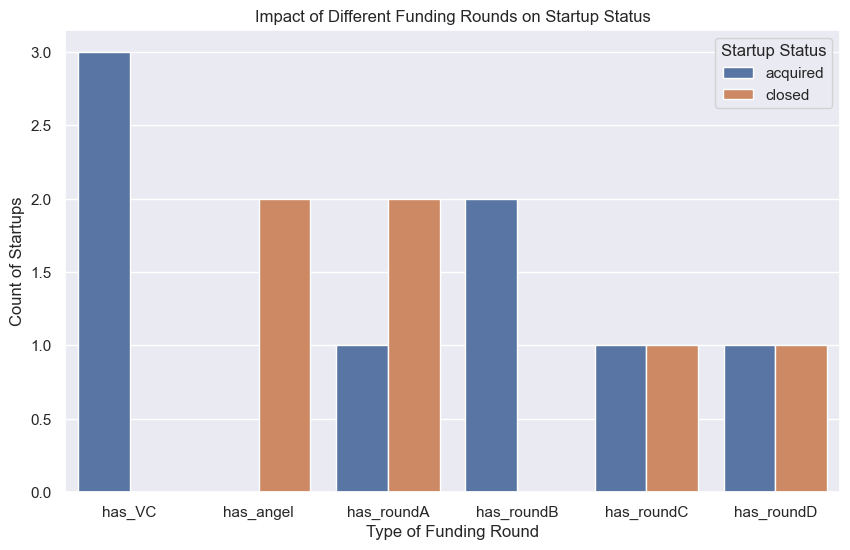

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modified DataFrame creation with equal length lists
data = {
    'has_VC': [1, 0, 1, 0, 1],
    'has_angel': [0, 1, 0, 1, 0],
    'has_roundA': [1, 1, 0, 1, 0],
    'has_roundB': [0, 0, 1, 0, 1],
    'has_roundC': [1, 0, 0, 1, 0],
    'has_roundD': [0, 1, 1, 0, 0],
    # Assuming the 'status' list is repeated to match the length of other lists
    'status': ['acquired', 'closed', 'acquired', 'closed', 'acquired']  # Adjust as per your actual data
}
df = pd.DataFrame(data)

# Reshape the DataFrame for easier plotting
melted_df = df.melt(id_vars='status', var_name='funding_round', value_name='has_funding')

# Filter out rows where funding was not received
melted_df = melted_df[melted_df['has_funding'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=melted_df, x='funding_round', hue='status')

plt.title('Impact of Different Funding Rounds on Startup Status')
plt.xlabel('Type of Funding Round')
plt.ylabel('Count of Startups')
plt.legend(title='Startup Status')
plt.show()




#### Average number of milestones achieved by startups

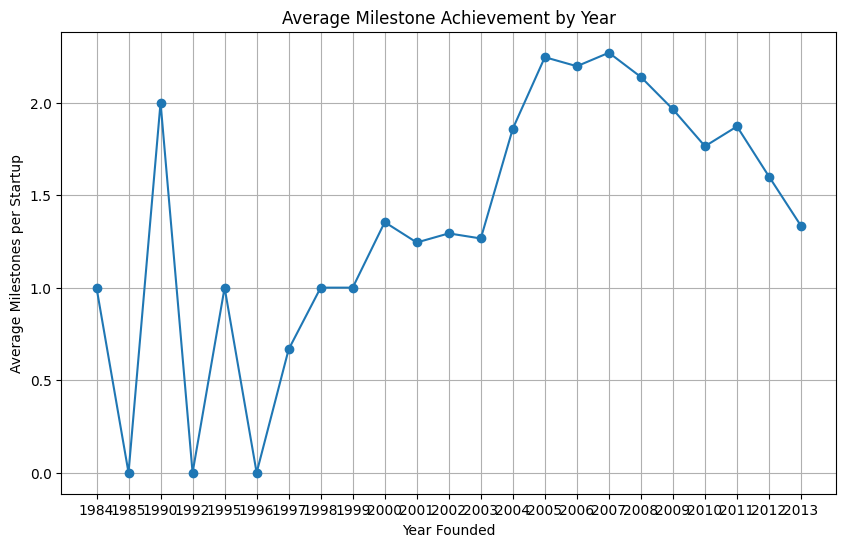

In [ ]:
# Assuming 'df' is the pandas DataFrame containing your data
# and 'founded_year' and 'milestones' are column names in your DataFrame

# Calculate the rolling average with a window size you deem appropriate (e.g., 3 years)
df['rolling_avg_milestones'] = (
    df.sort_values('founded_year')
    .groupby('founded_year')['milestones']
    .mean()
    .rolling(window=3, min_periods=1)
    .mean()
)

# Plotting the line graph with rolling average
plt.figure(figsize=(12, 6))
plt.plot(df['founded_year'], df['rolling_avg_milestones'], marker='o')
plt.title('Smoothed Average Milestone Achievement by Year')
plt.xlabel('Year Founded')
plt.ylabel('Rolling Average Milestones per Startup')
plt.grid(True)
plt.show()


#### How does the total funding amount relate to the number of milestones achieved by startups?

##### <span style="color: #77dd77;"> Final

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_26439/1616780233.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="age_first_funding_year", y="age_last_funding_year", data=data_df, label="first & last funding", palette="Greens")
/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_26439/1616780233.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="age_first_milestone_year", y="age_last_milestone_year", data=data_df, label="first & last milestone", palette="Blues")


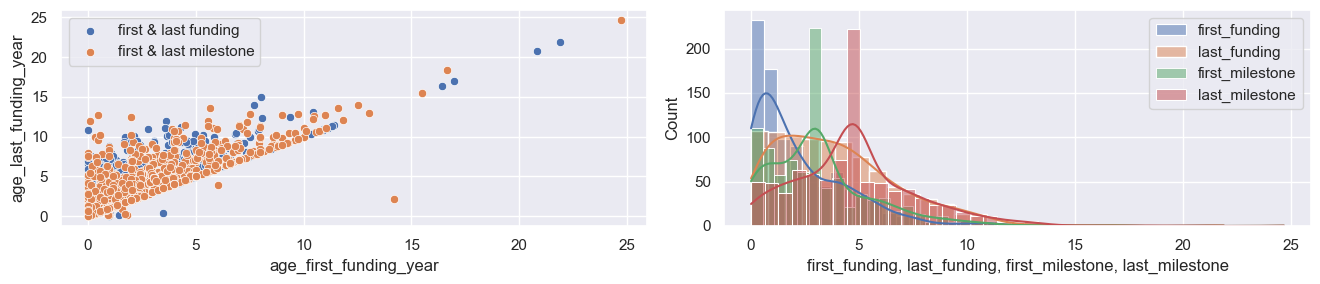

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3), dpi=100)

# First subplot for scatter plots
plt.subplot(1, 3, 1)
sns.scatterplot(x="age_first_funding_year", y="age_last_funding_year", data=data_df, label="first & last funding", palette="Greens")
sns.scatterplot(x="age_first_milestone_year", y="age_last_milestone_year", data=data_df, label="first & last milestone", palette="Blues")
plt.legend()

# Second subplot for distribution plots
plt.subplot(1, 3, 2)
sns.histplot(data_df["age_first_funding_year"], kde=True, label="first_funding")
sns.histplot(data_df["age_last_funding_year"], kde=True, label="last_funding")
sns.histplot(data_df["age_first_milestone_year"], kde=True, label="first_milestone")
sns.histplot(data_df["age_last_milestone_year"], kde=True, label="last_milestone")
plt.xlabel("first_funding, last_funding, first_milestone, last_milestone")
plt.legend()

plt.tight_layout()
plt.show()